[KMeans - Machine Learning Cơ Bản](https://machinelearningcoban.com/2017/01/01/kmeans)

[Bài 4: K-means Clustering](https://trituenhantao.io/bai-4-k-means-clustering/)

# **Tổng quan về K-Means Clustering**

**K-Means** là một thuật toán phân cụm (**clustering**) phổ biến trong học máy không giám sát (**unsupervised learning**).

Mục tiêu của K-Means là phân chia tập dữ liệu thành ***K* cụm** sao cho các điểm dữ liệu trong cùng **một cụm có đặc điểm giống nhau** và **khác biệt với các cụm còn lại**.


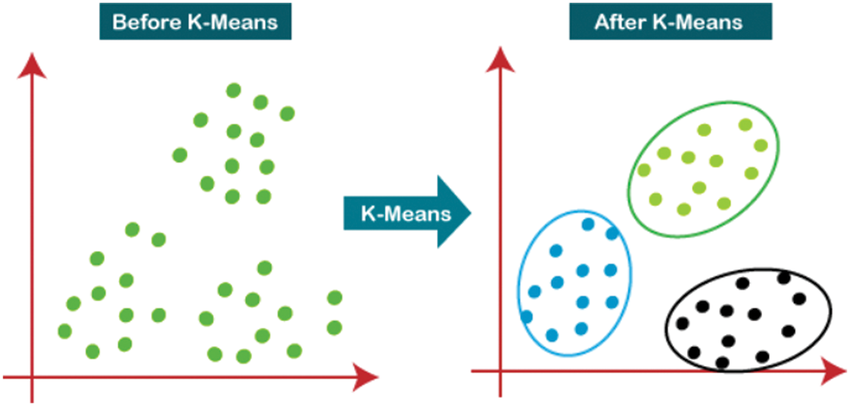

**Nguyên lý hoạt động**

1. **Chọn số cụm K**.
2. **Khởi tạo K tâm cụm (centroids)** ban đầu (ngẫu nhiên hoặc theo phương pháp như KMeans++).
3. **Gán mỗi điểm dữ liệu** vào cụm có tâm gần nhất (theo khoảng cách Euclidean).
4. **Cập nhật lại tâm cụm** bằng cách tính trung bình các điểm trong mỗi cụm.
5. **Lặp lại bước 3–4** cho đến khi các tâm cụm hội tụ hoặc đạt số vòng lặp tối đa.


**Ứng dụng**
- **Phân khúc khách hàng (Customer Segmentation):**
  Phân nhóm người dùng theo hành vi mua sắm, độ tuổi, thu nhập,...
  
- **Phân tích thị trường (Market Analysis):**
  Phân loại các khu vực thị trường có đặc điểm tiêu dùng tương đồng.

- **Xử lý ảnh (Image Segmentation):**
  Phân vùng ảnh theo màu sắc hoặc độ sáng, ứng dụng trong y tế, thị giác máy tính.

- **Nén ảnh (Image Compression):**
  Giảm số lượng màu trong ảnh bằng cách gom màu tương đồng lại một cụm.

- **Phát hiện bất thường (Anomaly Detection):**
  Phát hiện điểm dữ liệu không thuộc cụm nào rõ ràng.

**Hạn chế**
- Cần xác định số cụm K trước khi chạy.
- K-Means nhạy với khởi tạo ban đầu và outliers.
- Thích hợp với dữ liệu dạng số và cụm có hình dạng tròn (convex).


**Các thuật toán cải tiến K-Means**

- **K-Means++**: cải thiện bước khởi tạo tâm, giảm cực trị địa phương.  
- **Elbow Method / Silhouette Score**: hỗ trợ chọn số cụm K tối ưu.  
- **DBSCAN**: phân cụm không cần K, phát hiện outlier và cụm phi cầu.  
- **Gaussian Mixture Model (GMM)**: xử lý cụm chồng lấn bằng xác suất.  
- **Hierarchical Clustering**: phân cụm phân cấp, không cần xác định K trước.  


[Kaggle - Mall_Customers](https://www.kaggle.com/datasets/shwetabh123/mall-customers/data)

## **Demo Code**

In [20]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shwetabh123/mall-customers")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'mall-customers' dataset.
Path to dataset files: /kaggle/input/mall-customers


In [21]:
import shutil
import os

src = "/kaggle/input/mall-customers/Mall_Customers.csv"
dst = "/content/"

# Copy file về /content
shutil.copy(src, dst)
print("File store at: ", dst)

File store at:  /content/


In [22]:
import pandas as pd

data = pd.read_csv('/content/Mall_Customers.csv')
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


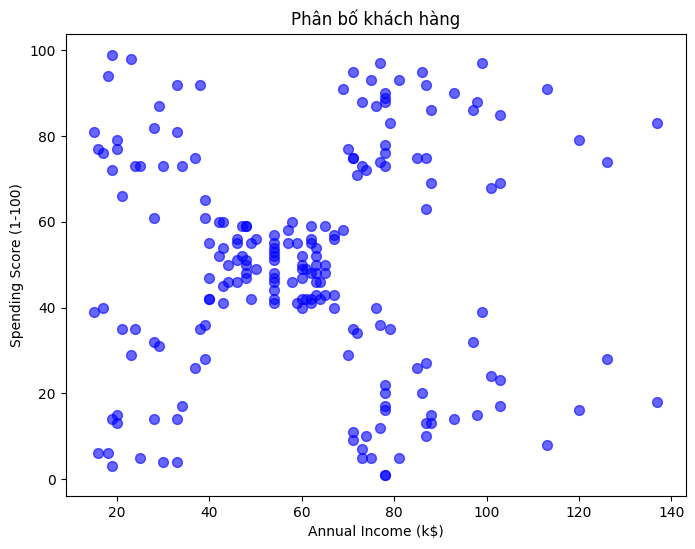

In [23]:
import matplotlib.pyplot as plt

# Scatter plot: Thu nhập vs Điểm chi tiêu
plt.figure(figsize=(8,6))
plt.scatter(data["Annual Income (k$)"], data["Spending Score (1-100)"],
            c='blue', s=50, alpha=0.6)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Phân bố khách hàng")
plt.show()

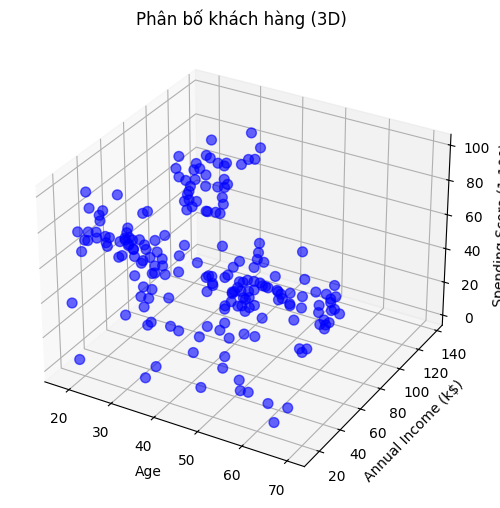

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Scatter plot 3D: Age - Income - Spending Score
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data["Age"],
           data["Annual Income (k$)"],
           data["Spending Score (1-100)"],
           c='blue', s=50, alpha=0.6)

ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
ax.set_title("Phân bố khách hàng (3D)")

plt.show()

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [26]:
data.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [27]:
data.duplicated().sum()

np.int64(0)

**Trong dataset Mall Customers, có 5 cột:**

- CustomerID → ID duy nhất, không dùng để phân cụm.

- Genre → categorical, nếu cần thì encode sang số.

 - Age, Annual Income (k$), Spending Score (1-100) → numerical, thường dùng để phân cụm.

**Ý nghĩa kinh doanh**

- Nếu muốn phân nhóm khách hàng theo **thói quen chi tiêu**, thì chỉ cần Income + Spending.

- Nếu muốn xem thêm **yếu tố nhân khẩu học**, thì thêm Age, Genre.

In [28]:
from sklearn.preprocessing import LabelEncoder

# Encode Genre (Male/Female -> 0/1)
#le = LabelEncoder()
#data["Genre_encoded"] = le.fit_transform(data["Genre"])

# Chọn đặc trưng để phân cụm
features = data[["Annual Income (k$)", "Spending Score (1-100)"]]

print(features)

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 1. Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

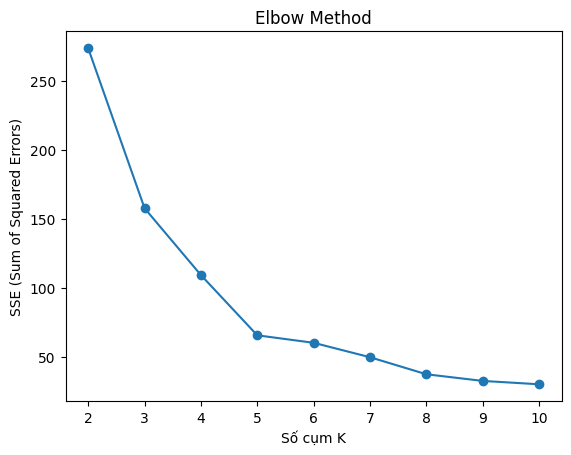

In [30]:
# 2. Elbow Method (SSE)
sse = []
K_range = range(2, 11)  # thử từ 2 đến 10 cụm
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)  # inertia_ = SSE

plt.plot(K_range, sse, marker='o')
plt.xlabel("Số cụm K")
plt.ylabel("SSE (Sum of Squared Errors)")
plt.title("Elbow Method")
plt.show()

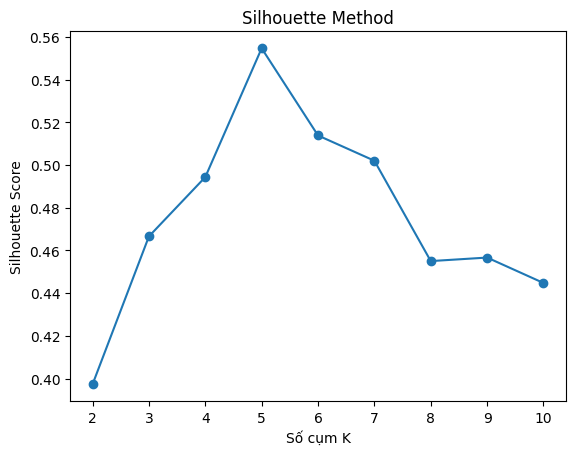

In [31]:
# 3. Silhouette Score
silhouette_scores = []
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel("Số cụm K")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method")
plt.show()

**Nhận xét chọn số cụm K**

- **Elbow Method**: đường cong giảm mạnh đến K=5 rồi bắt đầu phẳng ra → gợi ý số cụm hợp lý là 5.  
- **Silhouette Score**: đạt giá trị cao nhất (gần 1) tại K=5 → xác nhận phân cụm ở mức này rõ ràng và tách biệt tốt nhất.  

👉 Kết hợp cả hai phương pháp, ta chọn **K=5** làm số cụm tối ưu cho mô hình KMeans.


In [32]:
from sklearn.cluster import KMeans

# Fit mô hình với K=5
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_scaled)   # X_scaled là dữ liệu đã chuẩn hóa

# Thêm nhãn cụm vào DataFrame gốc
data["Cluster"] = labels

# Lấy tâm cụm (đã chuẩn hóa, nếu muốn có thể inverse transform)
centers = kmeans.cluster_centers_

print("Tâm cụm (trên dữ liệu đã chuẩn hóa):\n", centers)
print("\nSố lượng phần tử trong mỗi cụm:\n", data["Cluster"].value_counts())
data

Tâm cụm (trên dữ liệu đã chuẩn hóa):
 [[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]

Số lượng phần tử trong mỗi cụm:
 Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


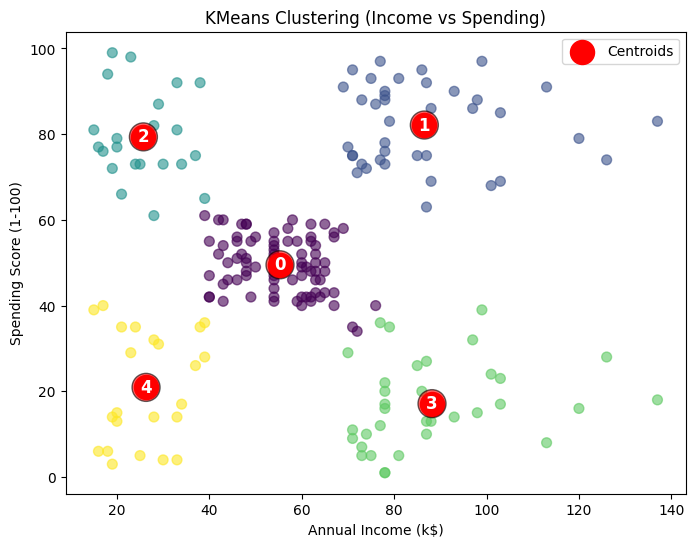

In [33]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Fit KMeans với K=5 (theo kết quả Elbow & Silhouette)
kmeans = KMeans(n_clusters=5, random_state=42)
data["Cluster"] = kmeans.fit_predict(X_scaled)

# Lấy tâm cụm (đã inverse để quay về scale gốc)
centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Vẽ scatter plot
plt.figure(figsize=(8,6))
plt.scatter(
    data["Annual Income (k$)"], data["Spending Score (1-100)"],
    c=data["Cluster"], cmap="viridis", s=50, alpha=0.6
)

# Vẽ centroids
plt.scatter(
    centers[:, 0], centers[:, 1],
    c="red", s=300, label="Centroids"
)

# Thêm số cụm vào centroids
for idx, (x, y) in enumerate(centers):
    plt.text(x, y, str(idx), fontsize=12, fontweight="bold",
             ha="center", va="center", color="white",
             bbox=dict(facecolor="red", alpha=0.6, boxstyle="circle,pad=0.3"))

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("KMeans Clustering (Income vs Spending)")
plt.legend()
plt.show()

**Ý nghĩa các cụm khách hàng (K=5)**

- **Cụm 0 (81 KH – Trung bình):** Thu nhập & chi tiêu trung bình → nhóm phổ thông, chiếm số đông.  
- **Cụm 1 (39 KH – Income cao, Spending cao):** Khách hàng VIP, có giá trị cao, cần ưu tiên chăm sóc.  
- **Cụm 2 (22 KH – Income thấp, Spending cao):** Nhóm trẻ/tiềm năng, chi tiêu mạnh dù thu nhập thấp.  
- **Cụm 3 (35 KH – Income cao, Spending thấp):** Khách giàu nhưng ít chi tiêu → cần chiến lược kích cầu.  
- **Cụm 4 (23 KH – Income thấp, Spending thấp):** Nhóm ít giá trị, không phải đối tượng ưu tiên.  

**Nhận xét:**  
- Kết quả phân cụm khá hợp lý: xác định được nhóm VIP, nhóm tiềm năng, nhóm ít giá trị.  
- Hạn chế: mới dựa trên 2 đặc trưng (Income, Spending), chưa phản ánh hết hành vi khách hàng thực tế.
